In [127]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
plt.rcParams['font.family'] = 'Malgun Gothic'


import seaborn as sns


In [53]:
df = pd.read_csv('업종별성별카드이용정보.csv')

In [54]:
df

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000
...,...,...,...,...,...,...,...
13221,202109,휴양콘도 운영업,내국인,여성,4139,4870,548884346
13222,202109,휴양콘도 운영업,법인,알수없음,1845,3838,1441503333
13223,202109,휴양콘도 운영업,제주도민,남성,741,873,49421248
13224,202109,휴양콘도 운영업,제주도민,여성,743,894,52177033


<AxesSubplot:xlabel='업종명'>

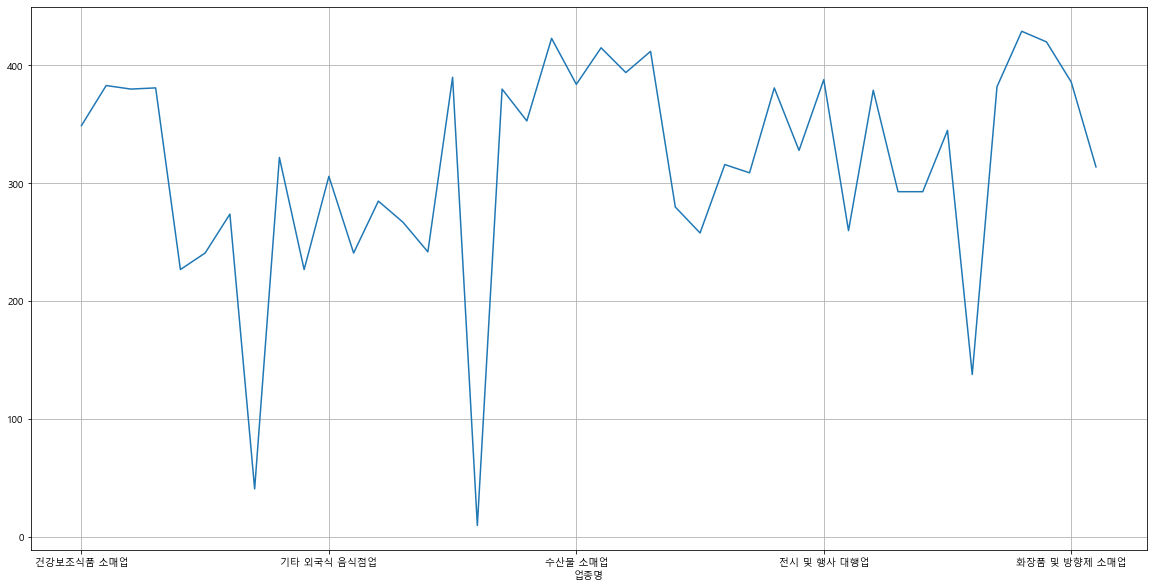

In [55]:
df.groupby(df.업종명).이용자수.count().plot(figsize=(20,10), grid=True)

In [57]:
df

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000
...,...,...,...,...,...,...,...
13221,202109,휴양콘도 운영업,내국인,여성,4139,4870,548884346
13222,202109,휴양콘도 운영업,법인,알수없음,1845,3838,1441503333
13223,202109,휴양콘도 운영업,제주도민,남성,741,873,49421248
13224,202109,휴양콘도 운영업,제주도민,여성,743,894,52177033


In [58]:
pd.DataFrame(df.groupby(df.이용자구분).이용금액.sum())

,이용금액
이용자구분,
기타외국,32561083322
내국인,2210898164265
동남아,10848355395
법인,1942721881820
일본,7297228012
제주도민,2965562344909
중국,25486074053


In [59]:
df.이용자구분.value_counts()

내국인     4332
제주도민    3555
법인      1795
중국      1186
기타외국    1106
일본       689
동남아      563
Name: 이용자구분, dtype: int64

In [60]:
df.이용자구분 = df.이용자구분.apply(lambda x: '외국인' if (x not in ['법인','제주도민','내국인']) else x)

In [61]:
df.이용자구분.value_counts()

내국인     4332
제주도민    3555
외국인     3544
법인      1795
Name: 이용자구분, dtype: int64

<AxesSubplot:ylabel='이용자구분'>

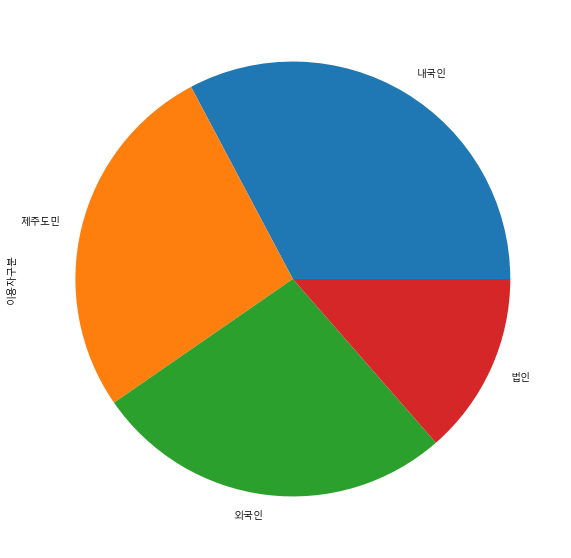

In [62]:
df.이용자구분.value_counts().plot.pie(figsize=(20,10))

In [45]:
df.groupby([df['연월'],df['이용자구분']]).이용자수.sum()

연월      이용자구분
201801  내국인      1254667
        법인        451796
        외국인         1477
        제주도민     1918548
201802  내국인      1041820
                  ...   
202108  제주도민     2017125
202109  내국인      1179102
        법인        446774
        외국인         2763
        제주도민     2044765
Name: 이용자수, Length: 180, dtype: int64

In [64]:
df.연월 = df.연월.apply(lambda x: int(x/100))

In [65]:
df.연월

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
13221    2021
13222    2021
13223    2021
13224    2021
13225    2021
Name: 연월, Length: 13226, dtype: int64

In [152]:
df.groupby([df['연월'],df['이용자구분']]).이용자수.sum()

연월    이용자구분
2018  내국인      16089622
      법인        5970872
      외국인         64526
      제주도민     24817093
2019  내국인      16903282
      법인        6148994
      외국인         90056
      제주도민     25478057
2020  내국인      12829647
      법인        5603286
      외국인         65776
      제주도민     26617742
2021  내국인      11080965
      법인        4362259
      외국인         22951
      제주도민     18024009
Name: 이용자수, dtype: int64

In [86]:
df.이용자구분[df.이용자구분=='외국인']

0        외국인
4        외국인
6        외국인
9        외국인
10       외국인
        ... 
13209    외국인
13212    외국인
13213    외국인
13219    외국인
13225    외국인
Name: 이용자구분, Length: 3544, dtype: object

<AxesSubplot:xlabel='연월,이용자구분'>

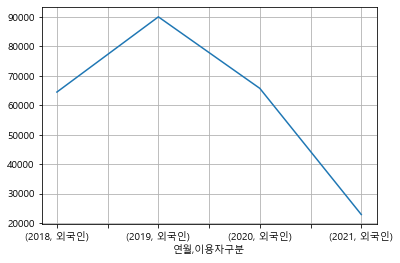

In [91]:
df.groupby([df['연월'],df.이용자구분[df.이용자구분=='외국인']]).이용자수.sum().plot(grid=True)

<AxesSubplot:xlabel='연월,이용자구분'>

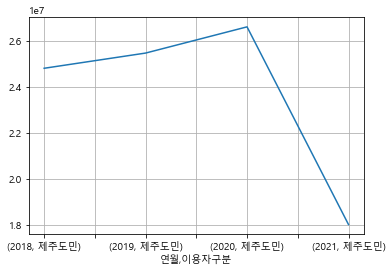

In [92]:
df.groupby([df['연월'],df.이용자구분[df.이용자구분=='제주도민']]).이용자수.sum().plot(grid=True)

<AxesSubplot:xlabel='연월,이용자구분'>

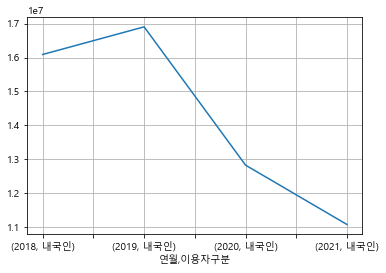

In [150]:
df.groupby([df['연월'],df.이용자구분[df.이용자구분=='내국인']]).이용자수.sum().plot(grid=True)

<AxesSubplot:xlabel='연월,이용자구분'>

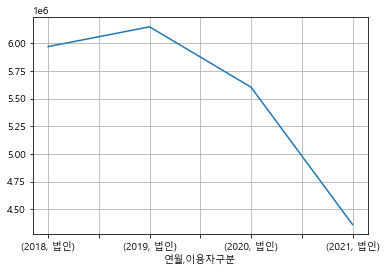

In [151]:
df.groupby([df['연월'],df.이용자구분[df.이용자구분=='법인']]).이용자수.sum().plot(grid=True)

<AxesSubplot:ylabel='업종명'>

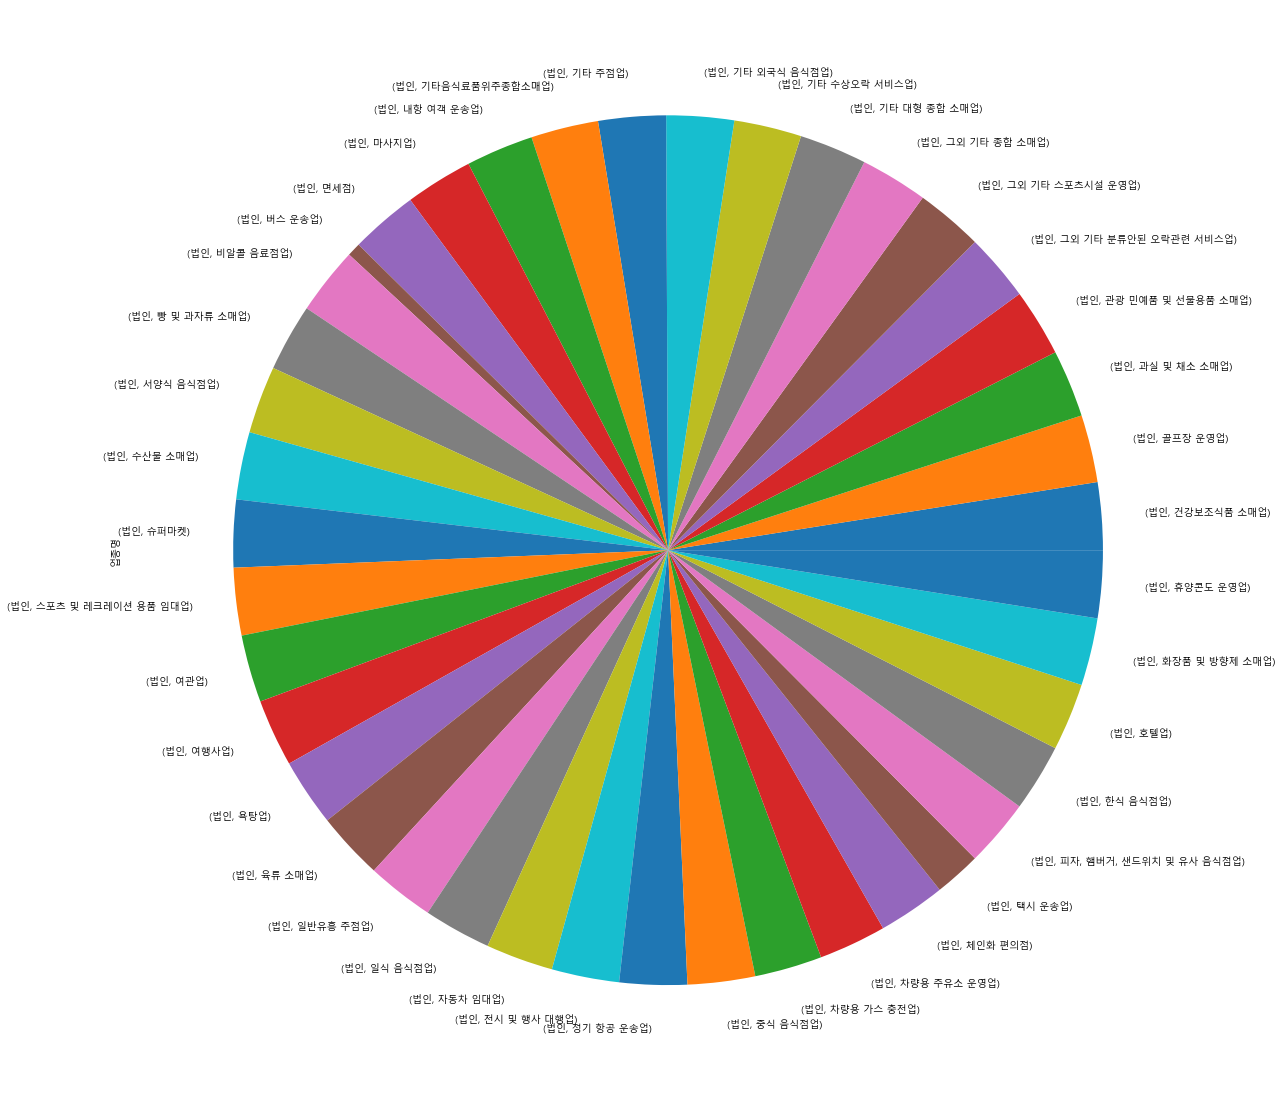

In [147]:
df.groupby([df.이용자구분[df.이용자구분=='법인'],df.업종명]).업종명.count().plot.pie(figsize=(30,20))

<AxesSubplot:ylabel='업종명'>

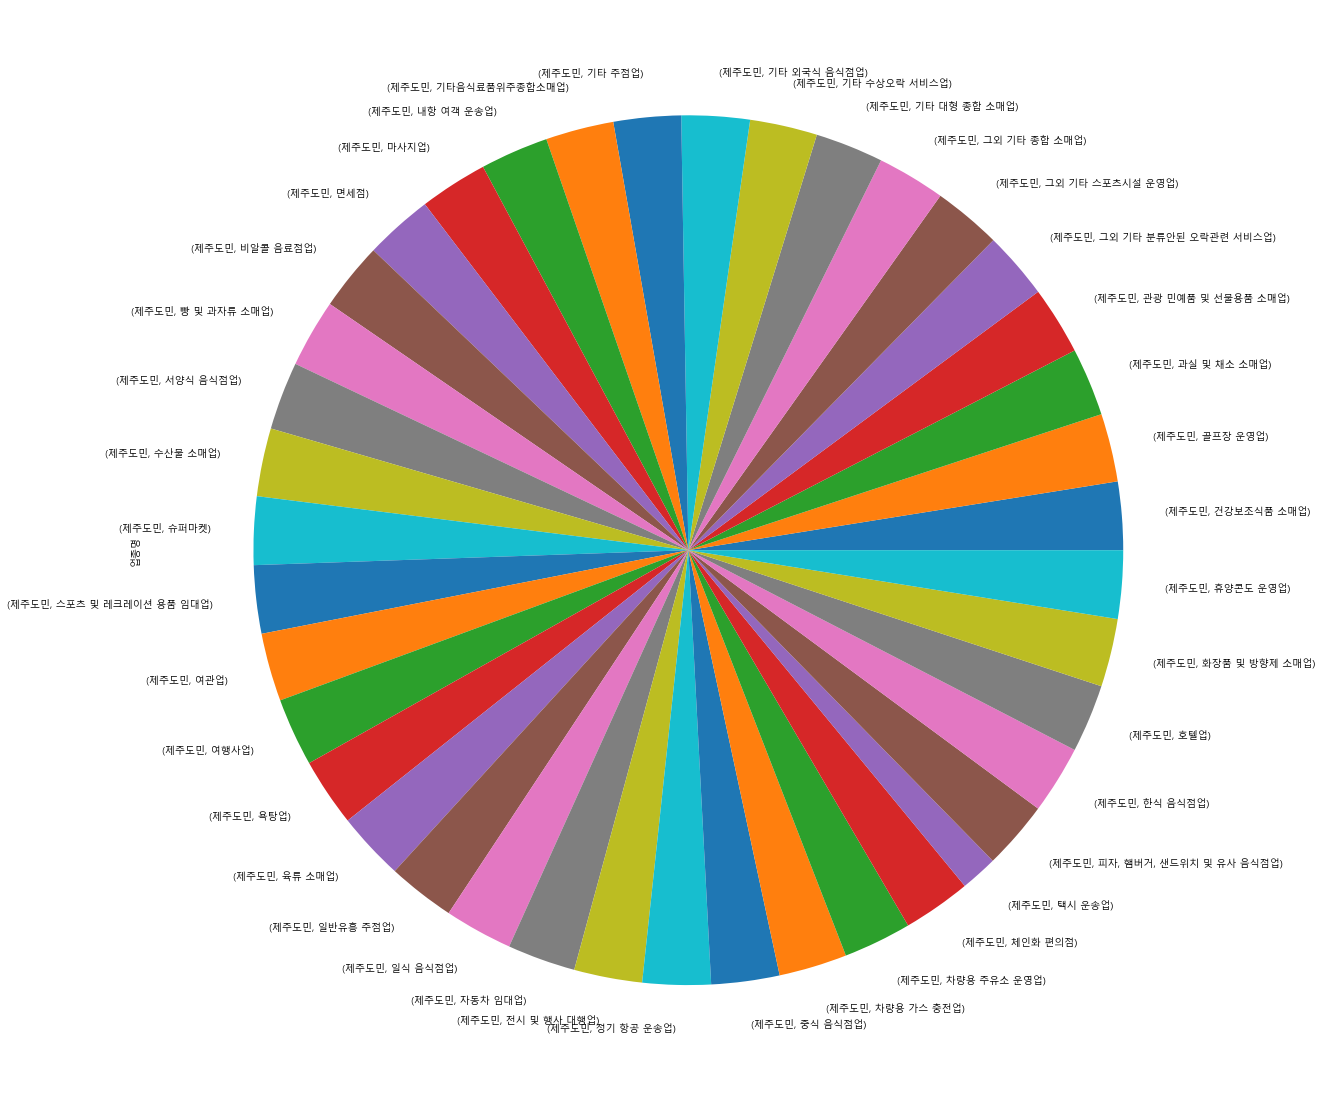

In [148]:
df.groupby([df.이용자구분[df.이용자구분=='제주도민'],df.업종명]).업종명.count().plot.pie(figsize=(30,20))

<AxesSubplot:ylabel='업종명'>

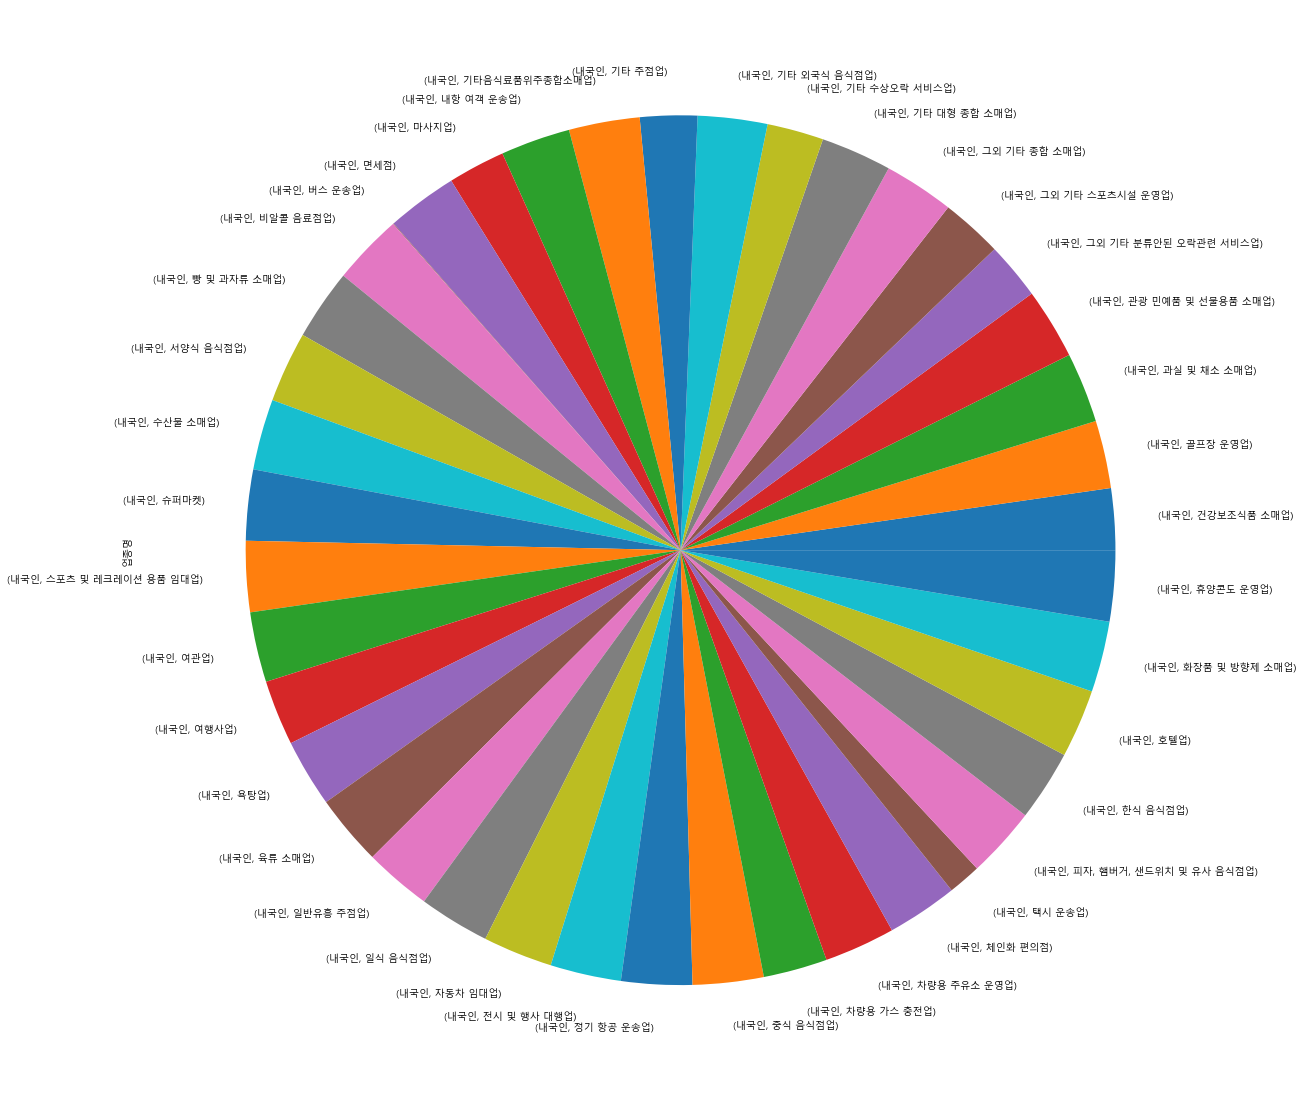

In [149]:
df.groupby([df.이용자구분[df.이용자구분=='내국인'],df.업종명]).업종명.count().plot.pie(figsize=(30,20))

<AxesSubplot:ylabel='업종명'>

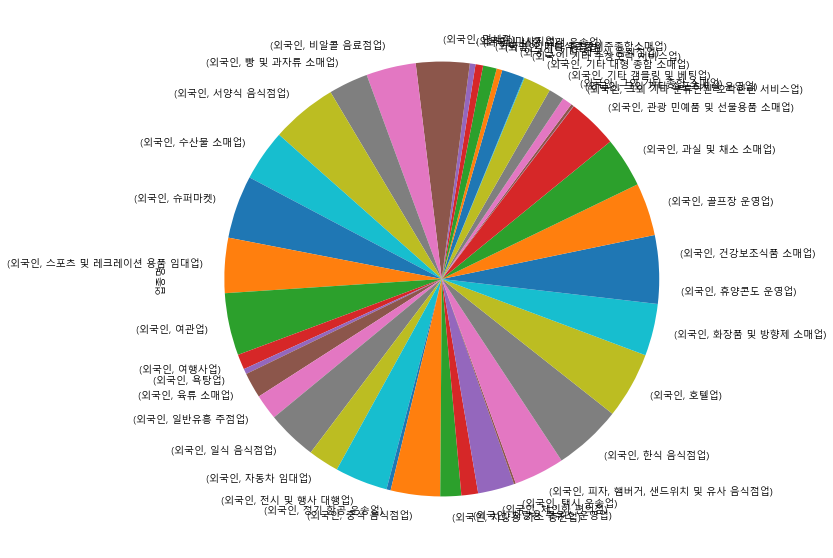

In [105]:
df.groupby([df.이용자구분[df.이용자구분=='외국인'],df.업종명]).업종명.count().plot.pie(figsize=(20,10))

In [107]:
df.set_index('업종명',inplace=True)
df['분류'] = 'asdf'
df.loc[['여관업','호텔업','휴양콘도 운영업'],'분류']='숙박업'
df.loc[['여행사업'],'분류']='여행업'
df.loc[['버스 운송업','택시 운송업'],'분류'] ='대중교통'
df.loc[['자동차 임대업','차량용 가스 충전업','차량용 주유소 운영업'],'분류'] ='렌터카'
df.loc[['내항 여객 운송업','정기 항공 운송업'],'분류'] ='항공사'
df.loc[['기타 갬블링 및 베팅업'],'분류'] ='카지노'
df.loc[['골프장 운영업','그외 기타 스포츠시설 운영업','기타 수상오락 서비스업','스포츠 및 레크레이션 용품 임대업','그외 기타 분류안된 오락관련 서비스업'],'분류'] ='레저,스포츠'
df.loc[['면세점'],'분류'] ='면세점'
df.loc[['마사지업','욕탕업','일반유흥 주점업','전시 및 행사 대행업'],'분류'] ='문화서비스 및 유원시설'
df.loc[['관광 민예품 및 선물용품 소매업','기타 대형 종합 소매업','슈퍼마켓','체인화 편의점','화장품 및 방향제 소매업','그외 기타 종합 소매업'],'분류'] ='쇼핑(면세점 제외)'
df.loc[['일식 음식점업','중식 음식점업','육류 소매업','피자, 햄버거, 샌드위치 및 유사 음식점업','수산물 소매업','한식 음식점업','서양식 음식점업','건강보조식품 소매업','과실 및 채소 소매업','기타 외국식 음식점업','기타 주점업','기타음식료품위주종합소매업','비알콜 음료점업','빵 및 과자류 소매업',],'분류']='식음료'

In [110]:
df.reset_index(inplace=True)

In [111]:
df

,업종명,연월,이용자구분,성별,이용자수,이용건수,이용금액,분류
0,건강보조식품 소매업,2018,외국인,알수없음,65,78,101523250,식음료
1,건강보조식품 소매업,2018,내국인,남성,159,165,25558470,식음료
2,건강보조식품 소매업,2018,내국인,알수없음,1,1,396000,식음료
3,건강보조식품 소매업,2018,내국인,여성,200,218,32041740,식음료
4,건강보조식품 소매업,2018,외국인,알수없음,8,8,1550000,식음료
...,...,...,...,...,...,...,...,...
13221,휴양콘도 운영업,2021,내국인,여성,4139,4870,548884346,숙박업
13222,휴양콘도 운영업,2021,법인,알수없음,1845,3838,1441503333,숙박업
13223,휴양콘도 운영업,2021,제주도민,남성,741,873,49421248,숙박업
13224,휴양콘도 운영업,2021,제주도민,여성,743,894,52177033,숙박업


<AxesSubplot:ylabel='업종명'>

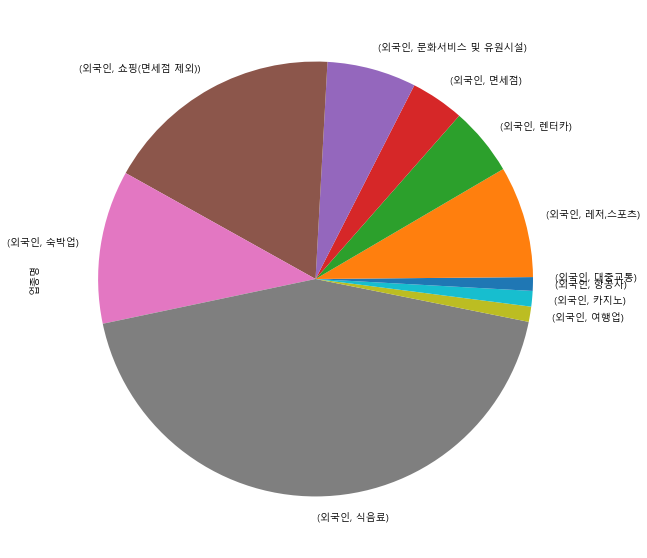

In [117]:
df.groupby([df.이용자구분[df.이용자구분=='외국인'],df.분류]).업종명.count().plot.pie(figsize=(20,10))

<AxesSubplot:ylabel='업종명'>

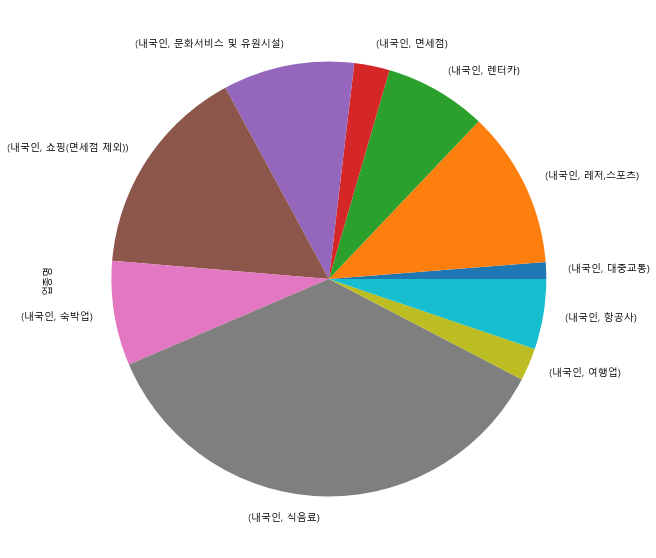

In [118]:
df.groupby([df.이용자구분[df.이용자구분=='내국인'],df.분류]).업종명.count().plot.pie(figsize=(20,10))

<AxesSubplot:ylabel='업종명'>

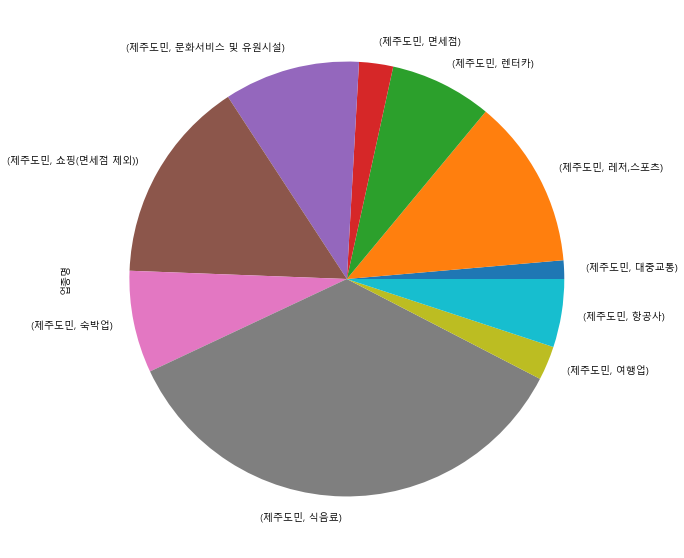

In [119]:
df.groupby([df.이용자구분[df.이용자구분=='제주도민'],df.분류]).업종명.count().plot.pie(figsize=(20,10))

<AxesSubplot:ylabel='업종명'>

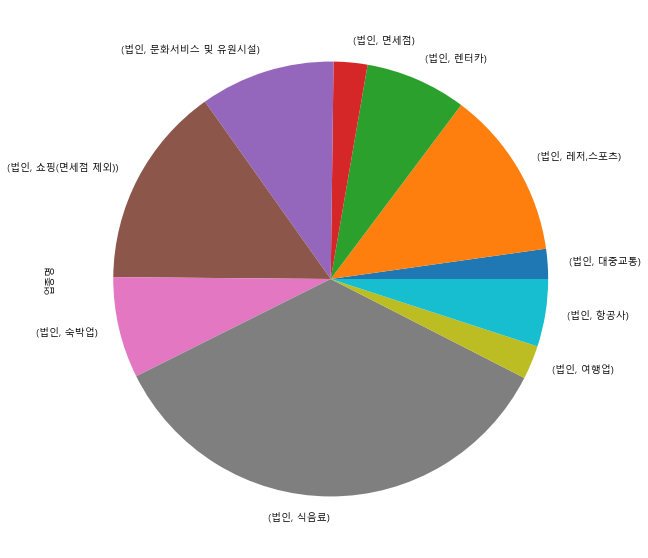

In [120]:
df.groupby([df.이용자구분[df.이용자구분=='법인'],df.분류]).업종명.count().plot.pie(figsize=(20,10))

In [124]:
df.groupby([df.이용자구분[df.이용자구분=='제주도민'],df.분류]).업종명.count()

이용자구분  분류          
제주도민   대중교통              49
       레저,스포츠           448
       렌터카              270
       면세점               90
       문화서비스 및 유원시설     359
       쇼핑(면세점 제외)       540
       숙박업              270
       식음료             1259
       여행업               90
       항공사              180
Name: 업종명, dtype: int64

In [125]:
df.groupby([df.이용자구분[df.이용자구분=='내국인'],df.분류]).업종명.count()

이용자구분  분류          
내국인    대중교통              54
       레저,스포츠           505
       렌터카              329
       면세점              114
       문화서비스 및 유원시설     423
       쇼핑(면세점 제외)       683
       숙박업              337
       식음료             1556
       여행업              105
       항공사              226
Name: 업종명, dtype: int64

In [126]:
df.groupby([df.이용자구분[df.이용자구분=='외국인'],df.분류]).업종명.count()

이용자구분  분류          
외국인    대중교통               5
       레저,스포츠           294
       렌터카              180
       면세점              141
       문화서비스 및 유원시설     235
       쇼핑(면세점 제외)       630
       숙박업              404
       식음료             1543
       여행업               40
       카지노               41
       항공사               31
Name: 업종명, dtype: int64

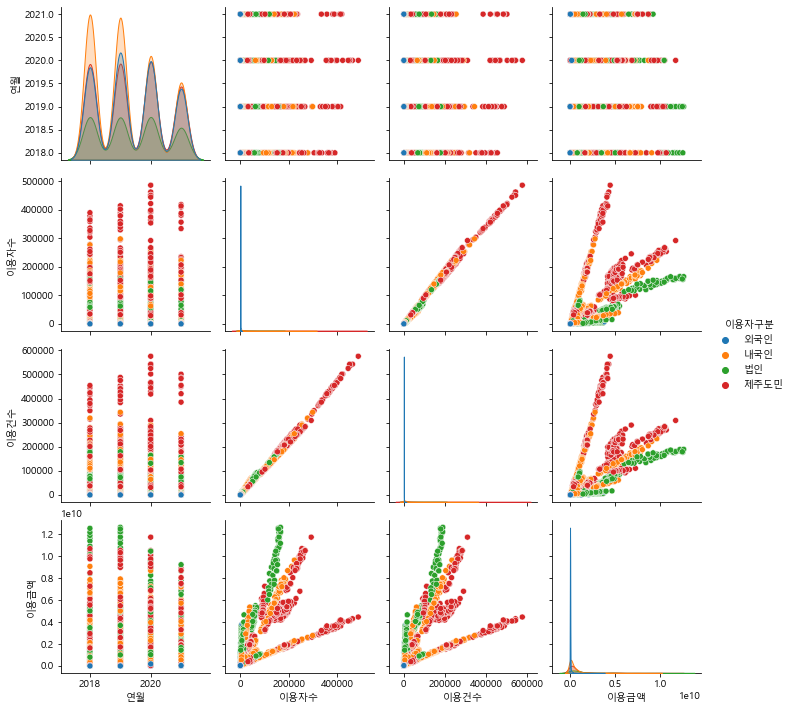

In [133]:
sns.pairplot(df, hue='이용자구분')

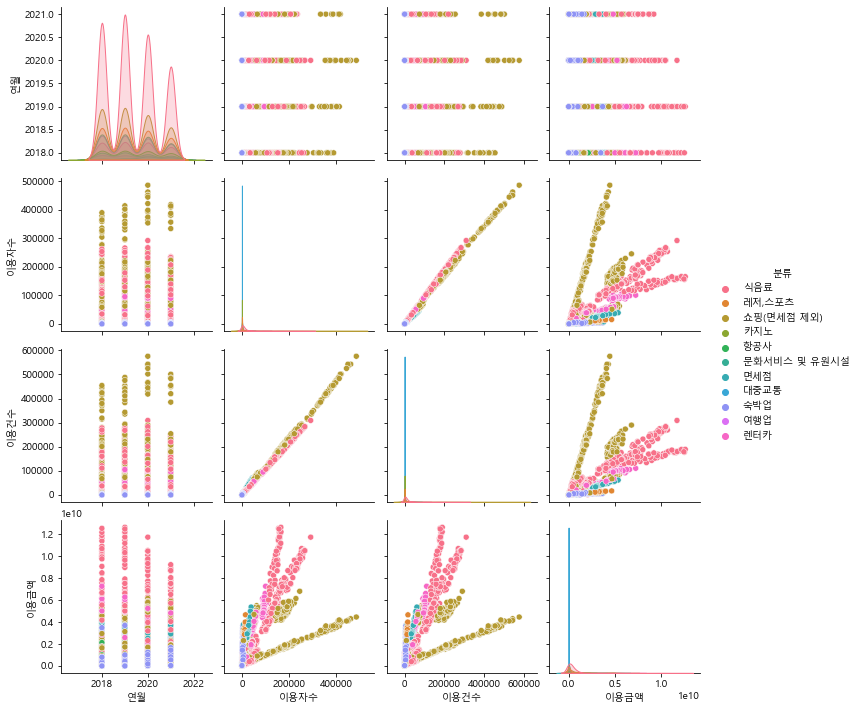

In [146]:
sns.pairplot(df, hue='분류')